In [1]:
import numpy as np
import mne
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [32]:
data[:, -1]

array([-16.533, -13.983, -11.954, -11.692, -11.949,  -6.998,  -8.865,
        -4.849,   1.912,  -6.108, -14.258, -13.781,   1.119, -12.144,
       -20.382,  -6.506, -13.747,  -7.478, -19.221,   2.246, -10.251,
        -9.585,  -3.816, -11.879, -12.431,  -4.479, -14.703,  -0.619,
       -12.187,  -5.033, -21.813, -11.748,   0.   ])

(33, 13537)
0
Creating RawArray with float64 data, n_channels=33, n_times=13537
    Range : 0 ... 13536 =      0.000 ...   105.750 secs
Ready.


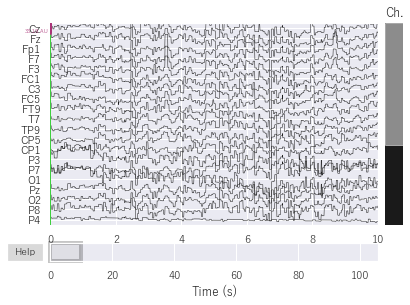

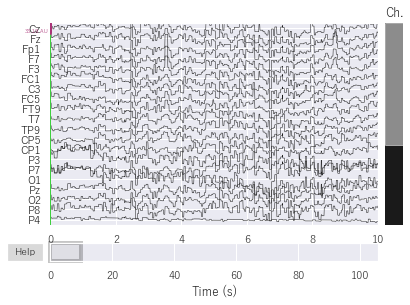

In [31]:
# Read the CSV file as a NumPy array
data = pickle.load(open("L39.binaryfile", 'rb')).T
data[:, -1][data[:, -1] == -1] = 2
print(data.shape)
print(np.sum(data[:, -1] == 2))

# Some information about the channels
channels = ["Cz","Fz","Fp1","F7","F3","FC1","C3","FC5","FT9","T7","TP9","CP5","CP1","P3","P7","O1","Pz","O2","P8","P4","CP2","CP6",
            "TP10","T8","FT10","FC6","FC4","C4","FC2","F4","F8","Fp2", "stim_channel"]  # TODO: finish this list

# Sampling rate of the Nautilus machine
sfreq = 128  # Hz

# Create the info structure needed by MNE
info = mne.create_info(channels, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(data, info)

# Plot it!
raw.plot()

In [27]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Cz, Fz, Fp1, F7, F3, FC1, C3, FC5, FT9, T7, TP9, CP5, CP1, P3, ...
 chs: 33 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 128.0 Hz
>

<Figure size 1152x576 with 0 Axes>

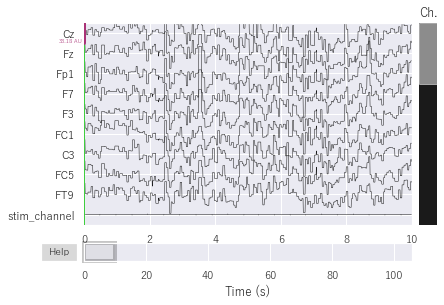

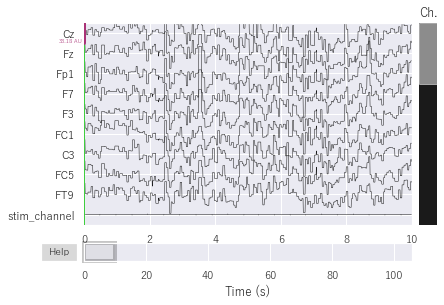

In [28]:
plt.figure(figsize=(16, 8))
order = np.arange(raw.info['nchan'])
order[9] = 32
order[32] = 9
raw.plot(n_channels=10, order=order)

In [29]:
print(raw)
raw.info

<RawArray | 33 x 13537 (105.8 s), ~3.5 MB, data loaded>


<Info | 7 non-empty values
 bads: []
 ch_names: Cz, Fz, Fp1, F7, F3, FC1, C3, FC5, FT9, T7, TP9, CP5, CP1, P3, ...
 chs: 33 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 128.0 Hz
>

In [30]:
events = mne.find_events(raw, 'stim_channel')
events

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
219 events found
Event IDs: [1]


array([[   61,     0,     1],
       [  124,     0,     1],
       [  187,     0,     1],
       [  248,     0,     1],
       [  311,     0,     1],
       [  373,     0,     1],
       [  437,     0,     1],
       [  500,     0,     1],
       [  561,     0,     1],
       [  624,     0,     1],
       [  681,     0,     1],
       [  743,     0,     1],
       [  805,     0,     1],
       [  865,     0,     1],
       [  928,     0,     1],
       [  989,     0,     1],
       [ 1052,     0,     1],
       [ 1113,     0,     1],
       [ 1175,     0,     1],
       [ 1238,     0,     1],
       [ 1299,     0,     1],
       [ 1364,     0,     1],
       [ 1427,     0,     1],
       [ 1491,     0,     1],
       [ 1553,     0,     1],
       [ 1614,     0,     1],
       [ 1676,     0,     1],
       [ 1737,     0,     1],
       [ 1801,     0,     1],
       [ 1862,     0,     1],
       [ 1920,     0,     1],
       [ 1983,     0,     1],
       [ 2045,     0,     1],
       [ 2

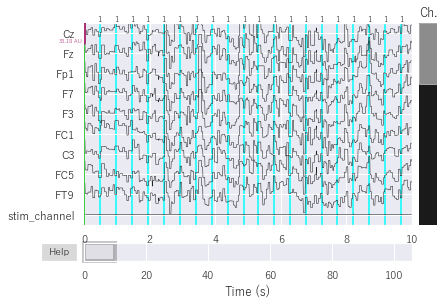

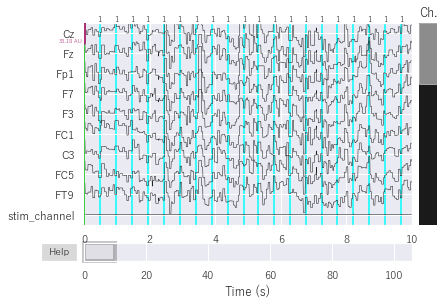

In [23]:
raw.plot(events=events, n_channels=10, order=order)

In [25]:
tmin, tmax = -0.1, 0.9
event_id = {'target':1, 'nontarget':-1}
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)
baseline = (None, 0.0)
reject = {}
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin, tmax=tmax, reject=reject, picks=picks)
epochs.plot()

ValueError: No matching events found for nontarget (event id -1)

In [11]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=16, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on howa we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

ValueError: picks (NoneNone, treated as "data") yielded no channels, consider passing picks explicitly